# Data Science Final Project

* Author: Ivory Poo
* Email: ipoo@scu.edu
* I certify that this notebook represents my own work for the Data Science with Python class in Santa Clara University.


# In this project, I will investigate the sales and customer reviews for Amazon Kindle Fire and other tablets.
1. What is the overall customer rating on Amazon Kindle Fire?
2. For rating of 1 and rating of 5, what are the messages to Amazon Kindle Fire's producer/seller?
3. For other tablets with high/ low sale ranking, what does customers say about the product?
4. For other tablets, do customer reviews and ranking have effect on sales ranking?

In [87]:
import pandas as pd
import numpy as np
dd=pd.read_csv('data/reviews.csv')
dd.head(3)
kindle=dd.loc[dd.Item_ID=='B0051VVOB2']  ## dataframe for  all Kindle customer reviews
## Kindle Fire, Full Color 7" Multi-touch Display
dd.head(3)

,Review_ID,Item_ID,Base_item_ID,Review_date,Reviewer_ID,Real_name,Verified_purchase,Rating,Title,Content,...,Helpful_votes_week15,Helpful_votes_week16,Helpful_votes_week17,Helpful_votes_week18,Helpful_votes_week19,Helpful_votes_week20,Helpful_votes_week21,Helpful_votes_week22,Helpful_votes_week23,Helpful_votes_week24
0,R100E6MT94PK6L,B0051VVOB2,NaN,1/8/2012,A1HGATCAMGXTGF,False,True,5,Love My Kindle Fire!,I love my fire and highly recommend it to anyo...,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5
1,R100HU42LKLLD0,B0057O9O6K,NaN,4/10/2012,A3GGO95QT2PP47,False,True,2,Not the best Tablet or a good buy,The operating system is is an early android. Y...,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
2,R100PBXP49AU0B,B0051VVOB2,NaN,3/26/2012,AA8JPO5R668P8,True,True,2,"Had it 3 months, would not purchase again",I have been reading on Kindle since the Kindle...,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6


# In this dataset, I found out that under customer reviews data, 93.3% of the reviews specifically are for Kindle Fire.

In [2]:
dd_item=dd.groupby('Item_ID').count()
dd_item=dd_item.sort_values('Review_ID',ascending= False).head(3)
dd_percent=dd_item/dd_item.sum()
dd_percent.head(3)

,Review_ID,Base_item_ID,Review_date,Reviewer_ID,Real_name,Verified_purchase,Rating,Title,Content,Total_votes_week1,...,Helpful_votes_week15,Helpful_votes_week16,Helpful_votes_week17,Helpful_votes_week18,Helpful_votes_week19,Helpful_votes_week20,Helpful_votes_week21,Helpful_votes_week22,Helpful_votes_week23,Helpful_votes_week24
Item_ID,,,,,,,,,,,,,,,,,,,,,
B0051VVOB2,0.933837,0.0,0.933837,0.933837,0.933837,0.933837,0.933837,0.933837,0.933837,0.899973,...,0.930746,0.931169,0.931565,0.931800,0.932441,0.932603,0.932899,0.932963,0.933409,0.933837
B004U78J1G,0.033842,1.0,0.033842,0.033842,0.033842,0.033842,0.033842,0.033842,0.033842,0.050102,...,0.035624,0.035455,0.035114,0.035014,0.034604,0.034539,0.034307,0.034219,0.034064,0.033842
B0045FM6SU,0.032321,0.0,0.032321,0.032321,0.032321,0.032321,0.032321,0.032321,0.032321,0.049925,...,0.033630,0.033376,0.033321,0.033185,0.032956,0.032858,0.032794,0.032818,0.032527,0.032321


In [3]:
from os import path
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

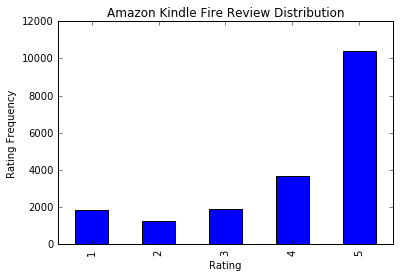

In [82]:
rating=kindle.Rating
rating=rating.value_counts()
rating=rating.sort_index()
review_bar_chart=rating.plot.bar(title= 'Amazon Kindle Fire Review Distribution')
review_bar_chart.set_xlabel('Rating')
review_bar_chart.set_ylabel('Rating Frequency')
plt.savefig("Kindle_Rating_Frequency.jpg")

# The distribution of verified and unverified reviews:
There is a Verified_purchase colume. From the value_counts function below, I see that proportion of unverified reviews are 30% of the total number of reviews. 

In [86]:
v=dd.Verified_purchase.value_counts()
v

True     27263
False    13478
Name: Verified_purchase, dtype: int64

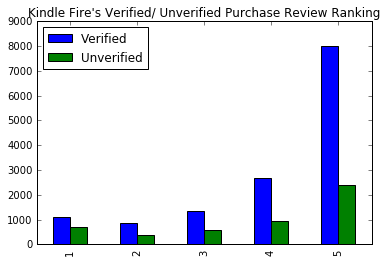

In [7]:
kindle_verified=kindle.loc[kindle['Verified_purchase']== True]
dd_verified=dd.loc[dd['Verified_purchase']== True]
rating_v=kindle_verified.Rating
rating_v=rating_v.value_counts()
rating_v=rating_v.sort_index()
rating_unv=rating-rating_v
rating_v=rating_v.rename('Verified')
rating_unv=rating_unv.rename('Unverified')
x=pd.concat([rating_v, rating_unv], axis=1)
x.plot(kind='bar',title= 'Kindle Fire\'s Verified/ Unverified Purchase Review Ranking' )
plt.savefig("Kindle_Rating_Frequency_Verify.jpg")

Then, I will present a WordCloud of all verified review. First, I join the review title and review content, so all the words are included in the wordcloud. 

In [8]:
dd.head()
dd_verified['all_reviews'] = dd_verified[['Title', 'Content']].apply(lambda x: ' '.join(x), axis=1)
kindle_verified['all_reviews'] = kindle_verified[['Title', 'Content']].apply(lambda x: ' '.join(x), axis=1)
kindle_verified.head(2)

/Users/Ivory/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Ivory/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Review_ID,Item_ID,Base_item_ID,Review_date,Reviewer_ID,Real_name,Verified_purchase,Rating,Title,Content,...,Helpful_votes_week16,Helpful_votes_week17,Helpful_votes_week18,Helpful_votes_week19,Helpful_votes_week20,Helpful_votes_week21,Helpful_votes_week22,Helpful_votes_week23,Helpful_votes_week24,all_reviews
0,R100E6MT94PK6L,B0051VVOB2,NaN,1/8/2012,A1HGATCAMGXTGF,False,True,5,Love My Kindle Fire!,I love my fire and highly recommend it to anyo...,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5,Love My Kindle Fire! I love my fire and highly...
2,R100PBXP49AU0B,B0051VVOB2,NaN,3/26/2012,AA8JPO5R668P8,True,True,2,"Had it 3 months, would not purchase again",I have been reading on Kindle since the Kindle...,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6,"Had it 3 months, would not purchase again I ha..."


# The Kindle Fire's WordCloud for all the verified purchase customer reviews.

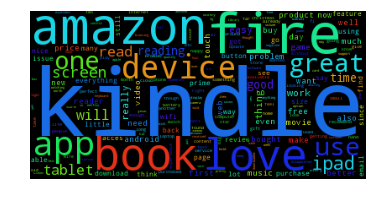

In [9]:
#Join the review content into a single string. The colume name of review is caled Content
words = ' '.join(kindle_verified.all_reviews).lower() #this is where to change the verified
wordcloud_gen = WordCloud().generate(words)
plt.imshow(wordcloud_gen)
plt.axis('off')
plt.show()
plt.savefig("Kindle_all_reviews.jpg")

# Let's analyze the customer reviews that have high votes on helpfulness.
This is done to filter out the reviews with no helpful content.

In [10]:
col_list1=list(kindle_verified)
tail=kindle_verified[col_list1[-25:]]
head=kindle_verified[col_list1[1:2]]
helpful_votes=head.join(tail) ########### this variable is built based on verified purchase
helpful_votes['avg_vote']=helpful_votes.mean(axis=1)
helpful_votes=helpful_votes.join(kindle_verified[col_list1[7:8]])
helpful_votes=helpful_votes.sort_values('avg_vote')

col_list2=list(helpful_votes)
tail=helpful_votes[col_list2[-3:]]
helpful_votes=head.join(tail)
helpful_votes_top10=helpful_votes.sort_values('avg_vote').tail(10) ##########change the # of reviews for helpful votes

# How can Amazon Kindle Fire be improved? 
I filtered out in the pool of top100 helpful reviews, which ranking scale is 1.

The keywords tell the producer what the customer dislike about the product. The producer can use these feedback to improve the product in order to increase the sales. Besides kindle, fire and amazon, the keywords are time, device, video and content. Tablet producer may look further into the size of video and time related functions in order to increase customers’ satisfactions. Other than that, the content that Amazon Kindle Fire is offering seems to be a concern for the customer.


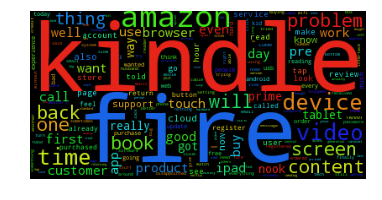

In [83]:
helpful_votes_top100=helpful_votes.sort_values('avg_vote').tail(100)
helpful_votes_top200=helpful_votes.sort_values('avg_vote').tail(200)
helpful_votes_top300=helpful_votes.sort_values('avg_vote').tail(300)

bad_review=helpful_votes_top100[helpful_votes_top100['Rating']== 1]

bad_review_str= ' '.join(bad_review.all_reviews).lower()
wordcloud_badreview = WordCloud().generate(bad_review_str)
plt.imshow(wordcloud_badreview)
plt.axis('off')
plt.show()
plt.savefig("Kindle_100_helpful_badreviews.jpg")

# What does customer like about Amazon Kindle Fire? 
I filtered out in the pool of top100 helpful reviews, which ranking scale is 5.

The keywords tell the producer, what the customers like about the product. It also gives insight to other tablets producer, what are customers’ expectations when they buy a tablet.
Beside kindle, fire and amazon, the keywords are iPad, movie, video screen and cloud.
Video also show up in the review of rating of 5. This keyword is interesting to look into since it has high distinction in customers’ likings.
Besides that, it seems that customers who are happy about Amazon Kindle Fire tend to compare the product with iPad, and they like about the screen and cloud storing.


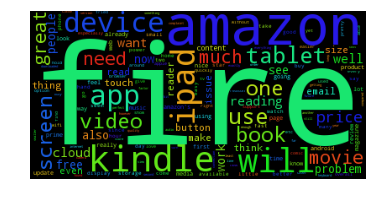

In [12]:
good_review=helpful_votes_top100[helpful_votes_top100['Rating']== 5]

good_review_str= ' '.join(good_review.all_reviews).lower()
wordcloud_goodreview = WordCloud().generate(good_review_str)
plt.imshow(wordcloud_goodreview)
plt.axis('off')
plt.show()
plt.savefig("Kindle_100_helpful_goodreviews.jpg")

# Other tablets: Analyzing sales using average of sales ranking over 24 weeks:

In [13]:
sales = pd.read_csv('data/sale.csv')

In [14]:
col_list=list(sales)
topsale=sales[col_list[0:27]]
topsale=topsale.drop(['Upc'], axis=1)
topsale['avg_rank']=topsale.mean(axis=1)
topsale_sorted=topsale.sort_values(['avg_rank'])
topsale_sorted=topsale_sorted.dropna(subset = ['avg_rank'])
topsale_sorted=topsale_sorted[1:]

# This is the list of top 10 sale product is shown below:

In [15]:
#sales=ds.dropna(subset = ['Sales_rank_week24'])

h_ranked=topsale_sorted.avg_rank.min()
#sorted_sales=sales.sort_values(['Sales_rank_week24'])
top_product_name=topsale_sorted.Title[0:100]
top_product_id=topsale_sorted.Item_ID[0:100]

top_product_name.tail(10)

268    Apple iPad 2 MC983LL/A Tablet (32GB, Wifi + AT...
137    Toshiba Excite AT305-T16 10.1-Inch Tablet (Cha...
252    Samsung Galaxy Tab Gt-p7500 16gb, Wi-fi + 3g U...
152    7 Inch Epad Android 2.2 VIA 8650 Camera Flash ...
791    Ainol NOVO7 Elf II Cortex-A9 Dual-Core 1.5GHz ...
123    Ainol NOVO7 Paladin - Android 4.0 (Ice Cream S...
47     Coby Kyros 7-Inch Android 4.0 4 GB Internet Ta...
65     Apple iPad (First Generation) MC496LL/A Tablet...
186           ASUS Eee Slate B121-A1 12.1-Inch Tablet PC
30     Velocity Micro T301 Cruz 7-Inch Android 2.0 Ta...
Name: Title, dtype: object

# Rating distribution for other tablets with high sale ranking
The ranking is increasing gradually from rank of 1 to rank of 3, and shot high to rank of 4 and rank of 5.

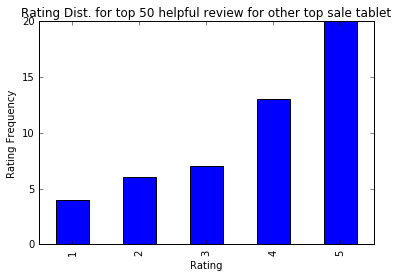

In [78]:
rating_othertop50=helpful50_other.Rating
rating_othertop50=rating_othertop50.value_counts()
rating_othertop50=rating_othertop50.sort_index()
review_bar_chart=rating_othertop50.plot.bar(title= 'Rating Dist. for top 50 helpful review for other top sale tablet')
review_bar_chart.set_xlabel('Rating')
review_bar_chart.set_ylabel('Rating Frequency')
plt.savefig("Rating Dist for other top sale.jpg")

# This is the word cloud for the review of top sale products in top 50 helpful votes.
The reviews are extracted with matched Item_ID with the list of top sale products.
The top keywords are tablet, app, Android, and screen. In rating distribution for top sale product, the rating from 1 to 5 is slowing increasing, with 5 being the highest rank.

/Users/Ivory/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


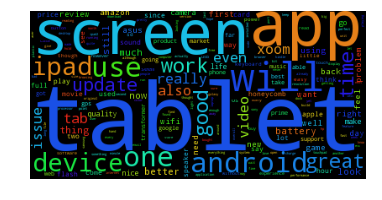

In [84]:
topsale_reviews=dd_verified.loc[dd['Item_ID'].isin(top_product_id)] #this is where to change the verified

col=list(topsale_reviews)
mid=topsale_reviews[col[7:8]]
tail=topsale_reviews[col[-25:]]
head=topsale_reviews[col_list1[1:2]]
tail['avg votes']=tail.mean(axis=1)
col1=list(tail)
tail=tail[col1[-2:]]
helpful=head.join(mid)
helpful=helpful.join(tail)
helpful=helpful.sort_values('avg votes')
helpful50_other=helpful.tail(50)

words_top_other=' '.join(helpful100_other.all_reviews).lower()
wordcloud_top_other = WordCloud().generate(words_top_other)
plt.imshow(wordcloud_top_other)
plt.axis('off')
plt.show()
plt.savefig('other_top50.jpg')

# The list of bottom 5 sale tablets is shown below:

In [35]:
l_ranked=topsale.avg_rank.max()
low_product_name=topsale_sorted.Title[-200:]
low_product_id=topsale_sorted.Item_ID[-200:]
#up to50 product ID to matched with user reviews
#as there is only two matched for up to lowest 40 sale products.
low_product_name.tail(10)

1252    NEW Android eTablet OS 2.1 4GB 800 MHz - Inclu...
1559    New - Coby Kyros MID8125-4G 8" 4 GB Tablet Com...
1690    Sony SGPT111US/S 9.4' 16 GB Tablet Computer - ...
1638            Pro Tools 9 Tablet (Official) by Indamixx
1357    Android eTablet OS 2.1 4GB 800 MHz - Includes ...
1345    Compaq TC1000PC Tablet PC notebook with dockin...
927     NEW E-Pad 7 Inch Digital Touch Screen Android ...
807     Quality Supersonic SC-7MID 7" Touch Screen MID...
1889    Gpad G11 7' Google Android 2.3 Built-in 3g/blu...
617     Top Quality iView IVIEW-710TPC 7 inch Tablet P...
Name: Title, dtype: object

# Rating distribution for other tablets with low sale ranking.
The result is surprisingly having the highest ranking of 5, followed by the ranking of 1.

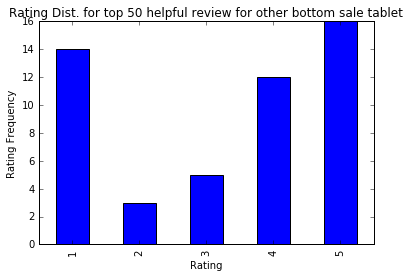

In [72]:
rating_otherb50=helpful50_other_bottom.Rating
rating_otherb50=rating_otherb50.value_counts()
rating_otherb50=rating_otherb50.sort_index()
review_bar_chart=rating_otherb50.plot.bar(title= 'Rating Dist. for top 50 helpful review for other bottom sale tablet')
review_bar_chart.set_xlabel('Rating')
review_bar_chart.set_ylabel('Rating Frequency')
plt.savefig("Rating Dist for other bottom sale.jpg")

# This is the word cloud for the review of bottom 50 sale products.
The reviews are extracted with matched Item_ID with the list of bottom sale products.
The top two keywords are screen and tablets. Some intuitive keywords are archoes, video, screen, andriod. 

/Users/Ivory/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


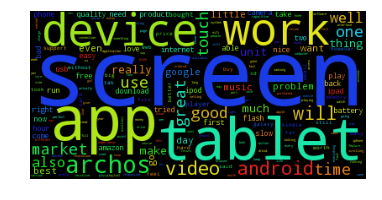

In [71]:
lowsale_reviews=dd_verified.loc[dd['Item_ID'].isin(low_product_id)] #this is where to change the verified

col=list(lowsale_reviews)
tail=lowsale_reviews[col[-25:]]
mid=lowsale_reviews[col[7:8]]
head=lowsale_reviews[col_list1[1:2]]
tail['avg votes']=tail.mean(axis=1)
col2=list(tail)
tail=tail[col2[-2:]]
helpful_bottom=head.join(mid)
helpful_bottom=helpful_bottom.join(tail)
helpful_bottom=helpful_bottom.sort_values('avg votes')
helpful50_other_bottom=helpful_bottom.tail(50)

words_low = ' '.join(helpful50_other_bottom.all_reviews).lower()
wordcloud_low = WordCloud().generate(words_low)
plt.imshow(wordcloud_low)
plt.axis('off')
plt.show()
plt.savefig('other_bottom50.jpg')

# Let's see the relationship between sale and customer rating.
It seems that the relationship between sale rank and review rank is positive but the strength is weak.

The average rating of the 100 product with highest and lowest sale is: 3.93 & 3.46 


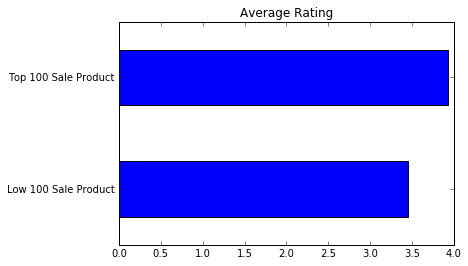

In [76]:
avg_rating_high_sale=topsale_reviews.Rating.mean()
avg_rating_low_sale=lowsale_reviews.Rating.mean()
d={'Top 100 Sale Product': avg_rating_high_sale, 'Low 100 Sale Product': avg_rating_low_sale}
avg_rating = pd.Series(data=d)
#label=['avg_rating_high_sale','avg_rating_high_sale']
avg_rating.plot(kind='barh',title= 'Average Rating')
plt.savefig('ratingandsale')
print 'The average rating of the 100 product with highest and lowest sale is: %.2f & %.2f ' %(avg_rating_high_sale, avg_rating_low_sale)